In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
#import graphviz

C:\Users\JYOTIKA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
balance_data = pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart.csv')
balance_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,reversible,1


In [3]:
X = balance_data[['cp','trestbps','ca']]
Y = balance_data.target 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0) 
#0

In [5]:
y_train

137    1
106    0
284    0
44     0
139    1
      ..
251    0
192    1
117    0
47     0
172    0
Name: target, Length: 212, dtype: int64

In [6]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=4, min_samples_leaf=5)
clf_gini.fit(X_train, y_train) 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [7]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 4, min_samples_leaf = 5)
clf_entropy.fit(X_train, y_train) 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [8]:
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred 

In [9]:
def cal_accuracy(y_test, y_pred):
    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 

In [10]:
print("Results Using Gini Index:")
# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

print("Results Using Entropy:")
# Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Gini Index:
Predicted values:
[0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1]
Accuracy :  81.31868131868131
Results Using Entropy:
Predicted values:
[0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1]
Accuracy :  81.31868131868131


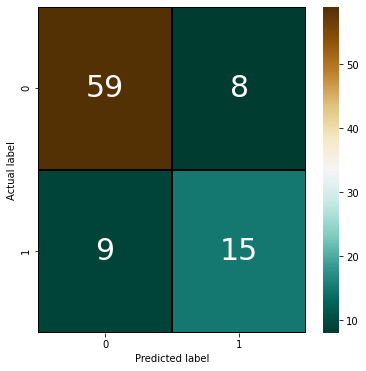

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_entropy)
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True,cmap='BrBG_r',linewidths=1, linecolor='black',annot_kws={"size": 30})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

Testing Accuracy for Decision Tree: 0.8131868131868132
Testing Sensitivity for Decision Tree: 0.8676470588235294
Testing Specificity for Decision Tree: 0.6521739130434783
Testing Precision for Decision Tree: 0.8805970149253731


In [13]:
from sklearn.metrics import f1_score
from sklearn.metrics import  accuracy_score
f1_score(y_test, y_pred_entropy)

0.6382978723404256